In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization


from PIL import Image
from numpy import asarray


In [ ]:
!unzip data.zip   #dataset zippé uploadé en local sur google collab

unzip:  cannot find or open data.zip, data.zip.zip or data.zip.ZIP.


#data "front simple" vs "front multi"

In [ ]:
!unzip data_front.zip

Archive:  data_front.zip
replace data_front/front simple/front_10141582006.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
os.chdir('/content/data_front')

def create_list_padd(n):
  a = []
  for i in range (n):
    a.append(list(np.zeros(3,dtype=np.int8)))
  return a 

def padd_image(arr):
    
    a,b,c = arr.shape
    arr_return = []
    for i in range (a):
        long = len(arr[i])
        if long < 400:
            arr_return.append(list(arr[i])+create_list_padd(400-long))
        else:
            arr_return.append(arr[i]) 
    if a < 400:
        for i in range (400-a):
            arr_return.append(create_list_padd(400))
    return(np.array(arr_return))

image_list = []
liste_front = os.listdir('front simple')
os.chdir('front simple')
for filename in liste_front:
    im=Image.open(filename)
    image_list.append(asarray(im))

padded_list = []
for i in range (len(image_list)):
    padded_list.append(padd_image(image_list[i])/255)

one_hotlist = []
for i in range (250):
    one_hotlist.append([1,0])

image_list = []
os.chdir('..')
liste_ing = os.listdir('front_mutli_drive')
os.chdir('front_mutli_drive')

for filename in liste_ing:
    im=Image.open(filename)
    image_list.append(asarray(im))

for i in range (len(image_list)):
    padded_list.append(padd_image(image_list[i])/255)

for i in range (250):
    one_hotlist.append([0,1])

# image_list = []
# os.chdir('..')
# liste_nut = os.listdir('nutrition')
# os.chdir('nutrition')
# for filename in liste_nut:
#     im=Image.open(filename).convert('L')
#     image_list.append(asarray(im))

# for i in range (len(image_list)):
#     padded_list.append(padd_image(image_list[i])/255)

# for i in range (440):
#     one_hotlist.append([0,0,1])

os.chdir('..')
os.chdir('..')

In [ ]:
print(len(padded_list))
print(len(one_hotlist))

500
500


In [ ]:
cols = ['onehot','image']

dataset_train = pd.DataFrame(columns = cols)
dataset_train['onehot'] = one_hotlist[0:200] + one_hotlist[250:450]
dataset_train['image'] = padded_list[0:200] + padded_list[250:450]

dataset_test = pd.DataFrame(columns = cols)
dataset_test['onehot'] = one_hotlist[200:250] + one_hotlist[450:]
dataset_test['image'] = padded_list[200:250] + padded_list[450:]





In [ ]:
dataset_train.describe

<bound method NDFrame.describe of      onehot                                              image
0    [1, 0]  [[[0.7254901960784313, 0.5686274509803921, 0.5...
1    [1, 0]  [[[0.7490196078431373, 0.6862745098039216, 0.6...
2    [1, 0]  [[[0.5372549019607843, 0.5529411764705883, 0.6...
3    [1, 0]  [[[0.9568627450980393, 0.9333333333333333, 0.8...
4    [1, 0]  [[[0.5647058823529412, 0.596078431372549, 0.60...
..      ...                                                ...
395  [0, 1]  [[[1.0, 0.9490196078431372, 0.7333333333333333...
396  [0, 1]  [[[0.17254901960784313, 0.10588235294117647, 0...
397  [0, 1]  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
398  [0, 1]  [[[0.25098039215686274, 0.10588235294117647, 0...
399  [0, 1]  [[[0.5764705882352941, 0.6980392156862745, 0.8...

[400 rows x 2 columns]>

In [ ]:
dataset_test.describe

<bound method NDFrame.describe of     onehot                                              image
0   [1, 0]  [[[0.09803921568627451, 0.11764705882352941, 0...
1   [1, 0]  [[[0.8470588235294118, 0.8156862745098039, 0.7...
2   [1, 0]  [[[0.9098039215686274, 0.9529411764705882, 0.9...
3   [1, 0]  [[[0.06666666666666667, 0.043137254901960784, ...
4   [1, 0]  [[[0.3411764705882353, 0.12156862745098039, 0....
..     ...                                                ...
95  [0, 1]  [[[0.7647058823529411, 0.6470588235294118, 0.5...
96  [0, 1]  [[[0.7725490196078432, 0.8549019607843137, 0.9...
97  [0, 1]  [[[0.7607843137254902, 0.8117647058823529, 0.8...
98  [0, 1]  [[[1.0, 1.0, 1.0], [1.0, 1.0, 1.0], [1.0, 1.0,...
99  [0, 1]  [[[0.7333333333333333, 0.6784313725490196, 0.6...

[100 rows x 2 columns]>

In [ ]:
shuffled_train = dataset_train.sample(frac=1)
shuffled_test = dataset_test.sample(frac=1)

In [ ]:
Xtrain = np.array(shuffled_train['image'].to_list())
Ytrain = np.array(shuffled_train['onehot'].to_list())
Xtest = np.array(shuffled_test['image'].to_list())
Ytest = np.array(shuffled_test['onehot'].to_list())

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(400, 400, 400, 3)
(400, 2)
(100, 400, 400, 3)
(100, 2)


In [ ]:
input_shape = (400,400,3)

model = Sequential()
model.add(Conv2D(16, kernel_size=(6,6), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((4,4)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 400, 400, 16)      1744      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 25, 25, 32)      

In [ ]:
loss = model.fit(Xtrain, Ytrain, batch_size=32, epochs=10, validation_split=0.1, callbacks=[], verbose=1)

Epoch 1/10
12/12 [==============================] - 70s 6s/step - loss: 1.2354 - accuracy: 0.5083 - val_loss: 0.6978 - val_accuracy: 0.6000
Epoch 2/10
12/12 [==============================] - 65s 5s/step - loss: 0.6828 - accuracy: 0.5250 - val_loss: 0.7063 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 66s 5s/step - loss: 0.6580 - accuracy: 0.6611 - val_loss: 0.7874 - val_accuracy: 0.3500
Epoch 4/10
12/12 [==============================] - 66s 6s/step - loss: 0.6491 - accuracy: 0.6528 - val_loss: 0.7424 - val_accuracy: 0.4250
Epoch 5/10
12/12 [==============================] - 69s 6s/step - loss: 0.6004 - accuracy: 0.7000 - val_loss: 0.7258 - val_accuracy: 0.5750
Epoch 6/10
12/12 [==============================] - 64s 5s/step - loss: 0.5354 - accuracy: 0.7389 - val_loss: 0.8325 - val_accuracy: 0.5750
Epoch 7/10
12/12 [==============================] - 66s 5s/step - loss: 0.4765 - accuracy: 0.7667 - val_loss: 0.8420 - val_accuracy: 0.5000
Epoch 8/10
12/12 [==

In [ ]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print("score=", score)

score= [1.0430269241333008, 0.6100000143051147]


#Baseline

In [ ]:
os.chdir('/content/data')

def padd_image(arr):
    a,b = arr.shape
    arr_return = []
    for i in range (a):
        long = len(arr[i])
        if long < 400:
            arr_return.append(list(arr[i])+[0]*(400-long))
        else:
            arr_return.append(arr[i])
    if a < 400:
        for i in range (400-a):
            arr_return.append([0]*400)
    return(np.array(arr_return))

image_list = []
liste_front = os.listdir('front')
os.chdir('front')
for filename in liste_front:
    im=Image.open(filename).convert('L')
    image_list.append(asarray(im))

padded_list = []
for i in range (len(image_list)):
    padded_list.append(padd_image(image_list[i])/255)

one_hotlist = []
for i in range (440):
    one_hotlist.append([1,0,0])

image_list = []
os.chdir('..')
liste_ing = os.listdir('ingredients')
os.chdir('ingredients')
for filename in liste_ing:
    im=Image.open(filename).convert('L')
    image_list.append(asarray(im))

for i in range (len(image_list)):
    padded_list.append(padd_image(image_list[i])/255)

for i in range (440):
    one_hotlist.append([0,1,0])

image_list = []
os.chdir('..')
liste_nut = os.listdir('nutrition')
os.chdir('nutrition')
for filename in liste_nut:
    im=Image.open(filename).convert('L')
    image_list.append(asarray(im))

for i in range (len(image_list)):
    padded_list.append(padd_image(image_list[i])/255)

for i in range (440):
    one_hotlist.append([0,0,1])

os.chdir('..')
os.chdir('..')

In [ ]:
print(len(padded_list))
print(len(one_hotlist))


1320
1320


In [ ]:
cols = ['onehot','image']

dataset_final = pd.DataFrame(columns = cols)
dataset_final['onehot'] = one_hotlist
dataset_final['image'] = padded_list

In [ ]:
dataset_final.describe

<bound method NDFrame.describe of          onehot                                              image
0     [1, 0, 0]  [[0.3333333333333333, 0.34509803921568627, 0.3...
1     [1, 0, 0]  [[0.45098039215686275, 0.3843137254901961, 0.4...
2     [1, 0, 0]  [[0.21176470588235294, 0.18823529411764706, 0....
3     [1, 0, 0]  [[0.996078431372549, 0.996078431372549, 0.9960...
4     [1, 0, 0]  [[0.38823529411764707, 0.39215686274509803, 0....
...         ...                                                ...
1315  [0, 0, 1]  [[0.7607843137254902, 0.47058823529411764, 0.4...
1316  [0, 0, 1]  [[0.03529411764705882, 0.03529411764705882, 0....
1317  [0, 0, 1]  [[0.5137254901960784, 0.5215686274509804, 0.52...
1318  [0, 0, 1]  [[0.6039215686274509, 0.6235294117647059, 0.64...
1319  [0, 0, 1]  [[0.1607843137254902, 0.16862745098039217, 0.1...

[1320 rows x 2 columns]>

In [ ]:
shuffled_data = dataset_final.sample(frac=1)
shuffled_data

,onehot,image
664,"[0, 1, 0]","[[0.3333333333333333, 0.34901960784313724, 0.3..."
195,"[1, 0, 0]","[[0.5176470588235295, 0.5058823529411764, 0.49..."
130,"[1, 0, 0]","[[0.8627450980392157, 0.8666666666666667, 0.87..."
1025,"[0, 0, 1]","[[0.8313725490196079, 0.8274509803921568, 0.81..."
437,"[1, 0, 0]","[[0.6745098039215687, 0.6705882352941176, 0.66..."
...,...,...
36,"[1, 0, 0]","[[0.6901960784313725, 0.7019607843137254, 0.61..."
201,"[1, 0, 0]","[[0.5019607843137255, 0.5803921568627451, 0.49..."
96,"[1, 0, 0]","[[0.4588235294117647, 0.4470588235294118, 0.43..."
576,"[0, 1, 0]","[[0.7647058823529411, 0.7647058823529411, 0.76..."


In [ ]:
X = shuffled_data['image'].to_list()
Y = shuffled_data['onehot'].to_list()

In [ ]:
Xtrain = np.array(X[:1056])
Xtest = np.array(X[1056:])
Ytrain = np.array(Y[:1056])
Ytest = np.array(Y[1056:])

In [ ]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(1056, 400, 400)
(1056, 3)
(264, 400, 400)
(264, 3)


##RéseauCNN


In [ ]:
input_shape = (400,400,1)

model = Sequential()
model.add(Conv2D(16, kernel_size=(6,6), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((4,4)))
# model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
# model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 400, 400, 16)      592       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 20000)             0         
                                                                 
 dense_9 (Dense)             (None, 64)               

In [ ]:
loss = model.fit(Xtrain, Ytrain, batch_size=128, epochs=12, validation_split=0.1, callbacks=[], verbose=1)

Epoch 1/12
8/8 [==============================] - 67s 8s/step - loss: 2.4295 - accuracy: 0.4189 - val_loss: 1.4530 - val_accuracy: 0.4906
Epoch 2/12
8/8 [==============================] - 65s 8s/step - loss: 1.1933 - accuracy: 0.5389 - val_loss: 0.9760 - val_accuracy: 0.6321
Epoch 3/12
8/8 [==============================] - 63s 8s/step - loss: 0.9584 - accuracy: 0.5453 - val_loss: 0.8887 - val_accuracy: 0.6132
Epoch 4/12
8/8 [==============================] - 63s 8s/step - loss: 0.8609 - accuracy: 0.6042 - val_loss: 0.8590 - val_accuracy: 0.6226
Epoch 5/12
8/8 [==============================] - 63s 8s/step - loss: 0.8066 - accuracy: 0.6432 - val_loss: 0.9133 - val_accuracy: 0.5472
Epoch 6/12
8/8 [==============================] - 63s 8s/step - loss: 0.7351 - accuracy: 0.6632 - val_loss: 0.8202 - val_accuracy: 0.5849
Epoch 7/12
8/8 [==============================] - 65s 8s/step - loss: 0.6829 - accuracy: 0.6968 - val_loss: 0.7437 - val_accuracy: 0.6321
Epoch 8/12
8/8 [==================

In [ ]:
score = model.evaluate(Xtest, Ytest, verbose=0)
print("score=", score)

score= [0.5818871259689331, 0.7424242496490479]


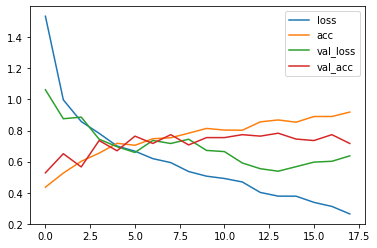

In [ ]:
 plt.figure(1)
plt.plot(loss.history['loss'], label="loss")
plt.plot(loss.history['accuracy'], label="acc")
plt.plot(loss.history['val_loss'], label="val_loss")
plt.plot(loss.history['val_accuracy'], label="val_acc")
plt.legend()
plt.show()

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
model.save('model.h5')